In [0]:
#Import Cartopy
!wget https://anaconda.org/conda-forge/cartopy/0.16.0/download/linux-64/cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!tar xvjf cartopy-0.16.0-py36h81b52dc_2.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/
!pip install shapely pyshp
!apt install libproj-dev libgeos-dev

This project uses Data from the Oscar Surface Current Database to map surface currents throughout the Gulf of Mexico Region. The data was obtained for me with the help of Edgar Gonzalez. 
To run the code, 4 csv data files need to be uploaded. These were sent with the email and uploaded to Github. The code is pretty self-explanatory and uses the surface current data to plot a vector field and a streamplot. The velocities are in m/s. 
The final portion of the code allows the user to input a starting latitude and longitude and using the streamplot function, plot the projected movement from this point.

In [0]:
#Import Lat, Long, and Vector Data
import pandas as pd
import numpy as np

df1 = pd.read_csv('latt.csv')
df2 = pd.read_csv('long.csv')
df3 = pd.read_csv('newmu.csv')
df4 = pd.read_csv('newmv.csv')

#Replace Nan values with 0
df3 = df3.replace(np.nan, 0)
df4 = df4.replace(np.nan, 0)

#Create Lists of Latitudes and Longitudes
latitudes = [30]
for y in range(0,45):
  x = df1.loc[y]['30']
  latitudes.append(x)


longitudes = []
for y in df2.loc[0]:
  longitudes.append(y)

#Convert Longitude Values
for i in range(0, len(longitudes)):
  longitudes[i] = longitudes[i] - 360



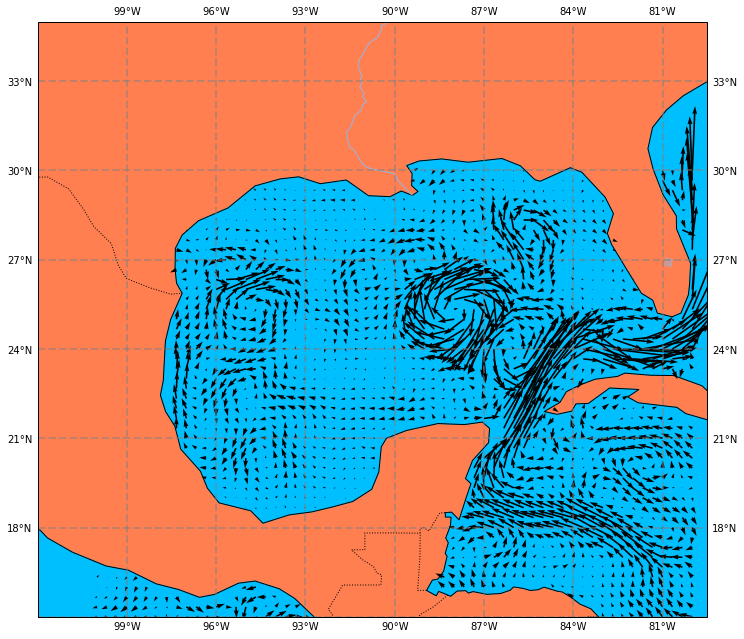

In [62]:
#Plot Vector Field
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#Plot and Gridlines Formatting
fig = plt.figure(figsize=(12, 14))

ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# isolate the Gulf of Mexico
ax.set_extent([-79.5, -102, 15, 35], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='coral')
ax.add_feature(cfeature.OCEAN, color = 'deepskyblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

#Create Lists of Latitude, Longitude, and Current Velocity
newlat = []
newlong = []
newu = []
newv = []
for i in range(0, len(latitudes)):
  for  j in range(0, len(longitudes)):
    u = df3.loc[i][j]
    v = df4.loc[i][j]
    newlong.append(longitudes[j])
    newlat.append(latitudes[i])
    newu.append(u)
    newv.append(v)


ax.quiver(newlong, newlat, newu, newv, scale = 0.015, minlength = 0.001)    
    
   

plt.show()

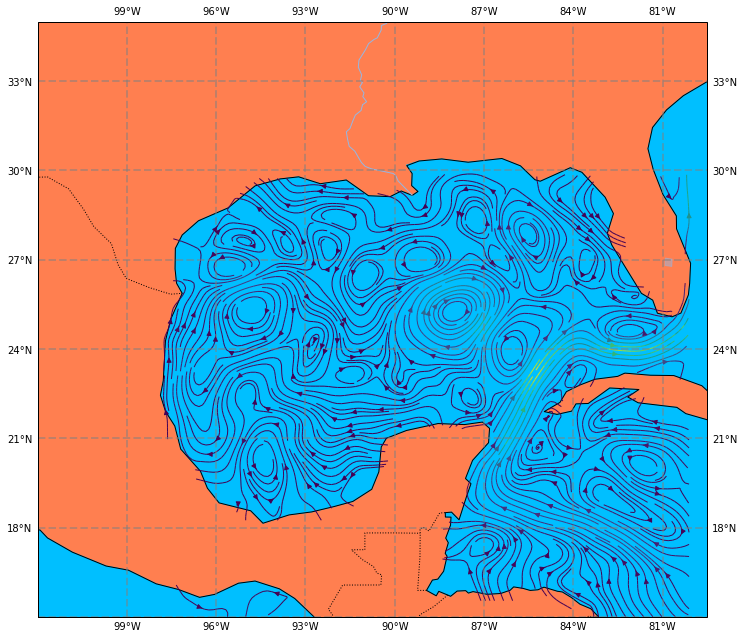

In [63]:
#Plot Streamplot - Shows general trend of surface current movement, with a lighter color indicating a higher velocity

fig = plt.figure(figsize=(12, 14))

ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#isolate the Gulf of Mexico
ax1.set_extent([-79.5, -102, 15, 35], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, color='coral')
ax1.add_feature(cfeature.OCEAN, color = 'deepskyblue')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.add_feature(cfeature.RIVERS)

#Convert u and v lists into 2-D arrays
twodu = []
twodv = []
for i in range(0, len(df3)):
  tempu = []
  for y in df3.loc[i]:
    tempu.append(y)
  twodu.append(tempu)
  

for j in range(0, len(df4)):
  tempv = []
  for z in df4.loc[j]:
     tempv.append(z)
  twodv.append(tempv)


long = np.asarray(longitudes)
lat = np.asarray(latitudes)
uarray = np.asarray(twodu)
varray = np.asarray(twodv)

magnitude = (uarray ** 2 + varray ** 2)* 0.25
ax1.streamplot(long, lat, uarray, varray, density = 5, linewidth = 1, color = magnitude, minlength = 0.1)


plt.show()

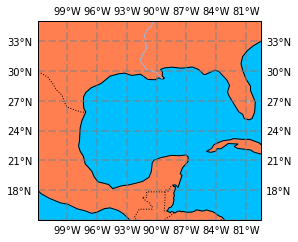

Choose a starting latitude and longitude to track movement by surface currents!
 
Longitude values should be in between -80 and -97° and Latitude values should be between 15 and 30°.
If your Latitude and Longitude points are on land (i.e. Florida), there will be an error !! :( 
 
Enter your longitude value:-85
Enter your latitude value:25


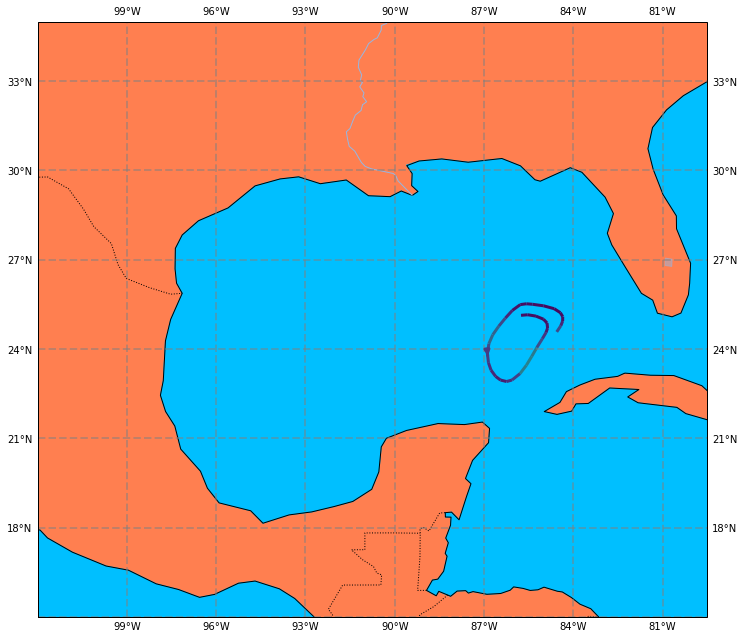

In [66]:
#Predict latent mocement through ocean given a starting Latitude and Longitude

#Plot Reference Map
fig = plt.figure(figsize=(4, 5))

ax2 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


#isolate the Gulf of Mexico
ax2.set_extent([-79.5, -102, 15, 35], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, color='coral')
ax2.add_feature(cfeature.OCEAN, color = 'deepskyblue')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.RIVERS)

plt.show()

#Obtain Data From User:
print('Choose a starting latitude and longitude to track movement by surface currents!')
print(' ')
print('Longitude values should be in between -80 and -97° and Latitude values should be between 15 and 30°.')
print('If your Latitude and Longitude points are on land (i.e. Florida), there will be an error !! :( ')
print(' ')
longitude = input('Enter your longitude value:')
latitude = input('Enter your latitude value:')

#Plot New Figure

fig = plt.figure(figsize=(12, 14))

ax2 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


#isolate the Gulf of Mexico
ax2.set_extent([-79.5, -102, 15, 35], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, color='coral')
ax2.add_feature(cfeature.OCEAN, color = 'deepskyblue')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.RIVERS)

seedpoints = np.array([[longitude],[latitude]])
magnitude = (uarray ** 2 + varray ** 2)* 0.25
ax2.streamplot(long, lat, uarray, varray, density = 2, linewidth = 3, color = magnitude, start_points = seedpoints.T)

plt.show()